In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [17]:
# Load the dataset
google_stock_data = pd.read_csv('D:\programs\data_science\google.csv')
google_stock_data = google_stock_data[['Date', 'Open', 'Close']]
google_stock_data['Date'] = pd.to_datetime(google_stock_data['Date'].apply(lambda x: x.split()[0]))
google_stock_data.set_index('Date', drop=True, inplace=True)

In [18]:
# Scale the data
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

# Split the data into training and test sets
training_size = round(len(google_stock_data) * 0.80)
train_data = google_stock_data[:training_size]
test_data = google_stock_data[training_size:]

# Function to create sequences and labels
def create_sequence(dataset):
    sequences = []
    labels = []
    start_idx = 0
    for stop_idx in range(50, len(dataset)):  # Selecting 50 rows at a time
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences), np.array(labels))

c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

In [19]:
# Create sequences and labels for training and test data
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Train the model
model.fit(train_seq, train_label, epochs=80, validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
107/107 [==============================] - 7s 37ms/step - loss: 6.4582e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0045 - val_mean_absolute_error: 0.0429
Epoch 2/80
107/107 [==============================] - 3s 29ms/step - loss: 6.7242e-05 - mean_absolute_error: 0.0058 - val_loss: 0.0052 - val_mean_absolute_error: 0.0463
Epoch 3/80
107/107 [==============================] - 3s 28ms/step - loss: 6.3580e-05 - mean_absolute_error: 0.0057 - val_loss: 0.0054 - val_mean_absolute_error: 0.0470
Epoch 4/80
107/107 [==============================] - 3s 29ms/step - loss: 5.8760e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0038 - val_mean_absolute_error: 0.0381
Epoch 5/80
107/107 [==============================] - 3s 29ms/step - loss: 5.8066e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0045 - val_mean_absolute_error: 0.0427
Epoch 6/80
107/107 [==============================] - 3s 29ms/step - loss: 5.6263e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0045 - val_mean_absolute_

In [23]:
# Predict on the test set
test_predicted = model.predict(test_seq)

# Inverse transform the predictions
test_inverse_predicted = MMS.inverse_transform(test_predicted)

# Create a DataFrame with actual and predicted values
gs_slic_data = google_stock_data.iloc[-len(test_inverse_predicted):].copy()
gs_slic_data[['Open_Predicted', 'Close_Predicted']] = test_inverse_predicted

26/26 [==============================] - 0s 11ms/step


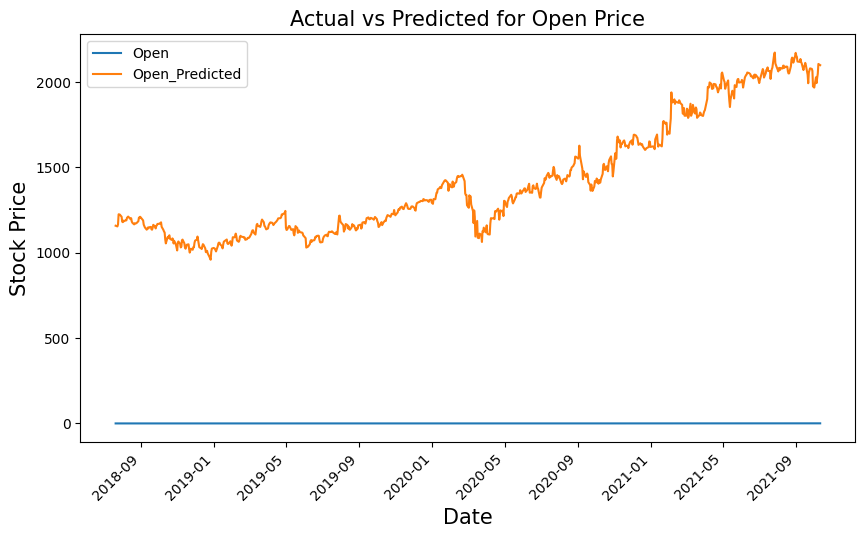

In [24]:
# Plot the actual vs. predicted open price
gs_slic_data[['Open', 'Open_Predicted']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for Open Price', size=15)
plt.show()

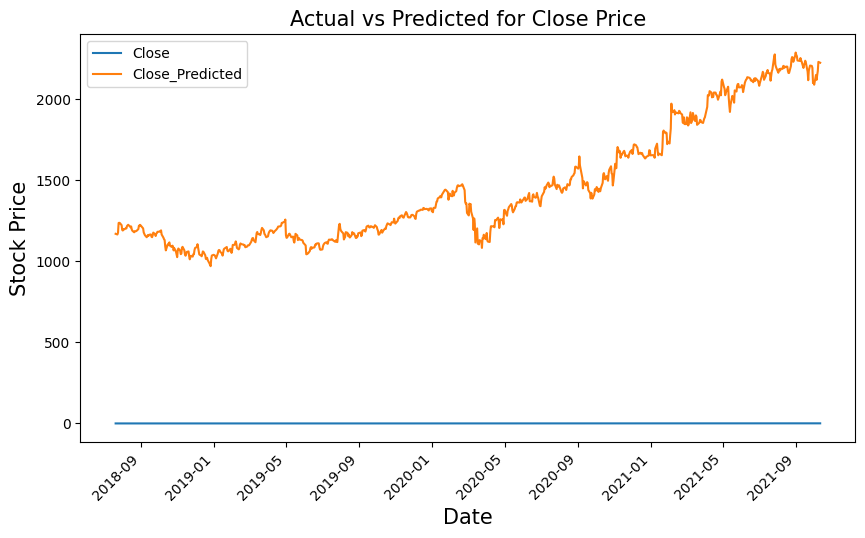

In [25]:
# Plot the actual vs. predicted close price
gs_slic_data[['Close', 'Close_Predicted']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for Close Price', size=15)
plt.show()